In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/eurusd_histo_data.csv')
column_names =['Open','High','Low']
df.drop(column_names, axis=1, inplace=True)
df.head()

Date   Price
0  01 January 2014  1.3754
1  02 January 2014  1.3672
2  03 January 2014  1.3588
3  06 January 2014  1.3628
4  07 January 2014  1.3616

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.tail()

Price
Date              
2024-03-18  1.0871
2024-03-19  1.0865
2024-03-20  1.0918
2024-03-21  1.0860
2024-03-22  1.0805

In [ ]:
df["Price"].plot(title="EURUSD close Prices",backend= 'plotly')

In [ ]:
#Create new columns with year and month:
df["year"] = df.index.year
df["month"] = df.index.strftime("%b")

In [ ]:
df.head()

Price  year month
Date                          
2014-01-01  1.3754  2014   Jan
2014-01-02  1.3672  2014   Jan
2014-01-03  1.3588  2014   Jan
2014-01-06  1.3628  2014   Jan
2014-01-07  1.3616  2014   Jan

**Visualizing Seasonal Patterns**

Text(0.5, 1.0, 'EURUSD CLOSING PRICES')

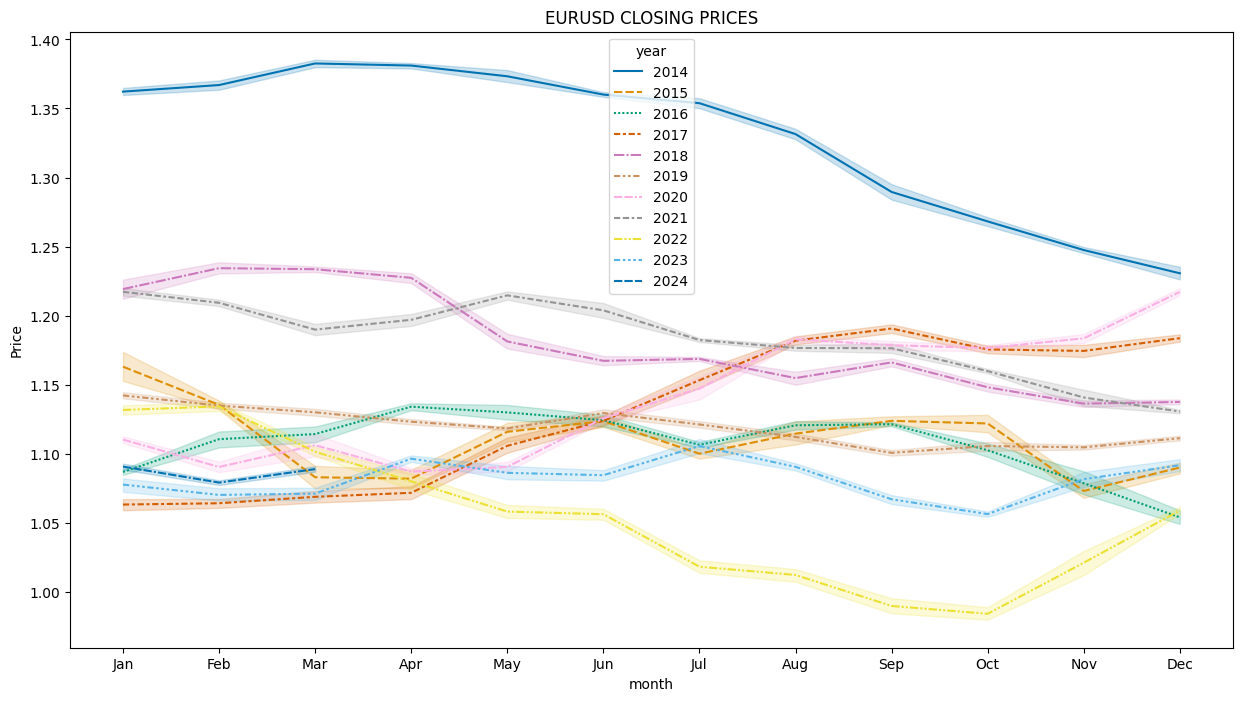

In [ ]:
#Create the seasonal plot:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.lineplot(data=df,
 x="month",
 y="Price",
 hue="year",
 style="year",
 legend="full",
 palette="colorblind")
plt.title("EURUSD CLOSING PRICES")

**Monthly plot**

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

In [ ]:
df_m = df.groupby(pd.Grouper(freq='M')).sum()

Text(0.5, 1.0, 'EURUSD Closing Prices')

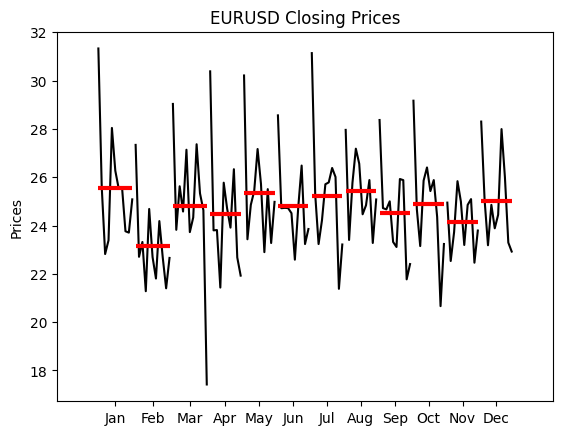

In [ ]:
month_plot(df_m["Price"], ylabel = 'Prices')
plt.title("EURUSD Closing Prices")


**Quarter plot**

Text(0.5, 1.0, 'EURUSD Closing Prices- Quarter plot')

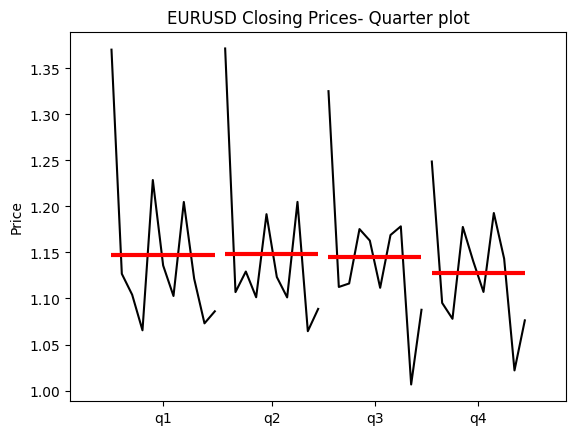

In [ ]:
quarter_plot(df["Price"].resample("Q").mean(),
 ylabel="Price")
plt.title("EURUSD Closing Prices- Quarter plot")

**Create a polar seasonal**

In [ ]:
fig = px.line_polar(
 df, r="Price", theta ="month",
 color="year", line_close=True,
 title="EURUSD Closing Prices- Polar seasonal plot",
 width=1000, height=700,
 range_r=[0.5, 1.5]
)
fig.show()

**Outlier detection with the Hampel filter**

In [ ]:
!pip install sktime
from sktime.transformations.series.outlier_detection import HampelFilter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00


In [ ]:
hampel_detector = HampelFilter(window_length=10,
 return_bool=True)
df["outlier"] = hampel_detector.fit_transform(df["Price"])

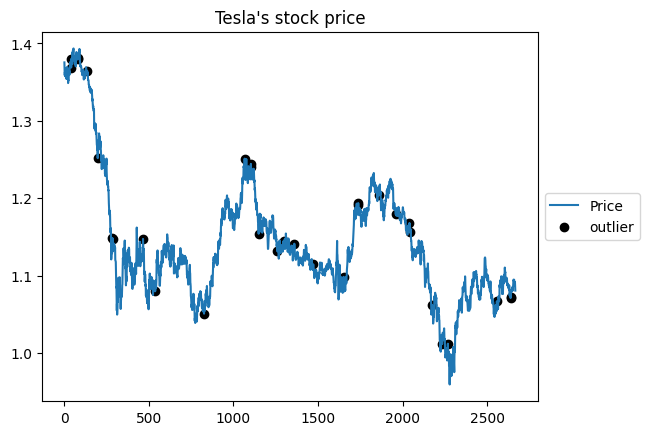

In [ ]:
fig, ax = plt.subplots()
df[["Price"]].plot(ax=ax)
ax.scatter(df.loc[df["outlier"]].index,
 df.loc[df["outlier"], "Price"],
 color="black", label="outlier")
ax.set_title("Eurusd price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

<Axes: title={'center': 'EURUSD rate'}, xlabel='Date'>

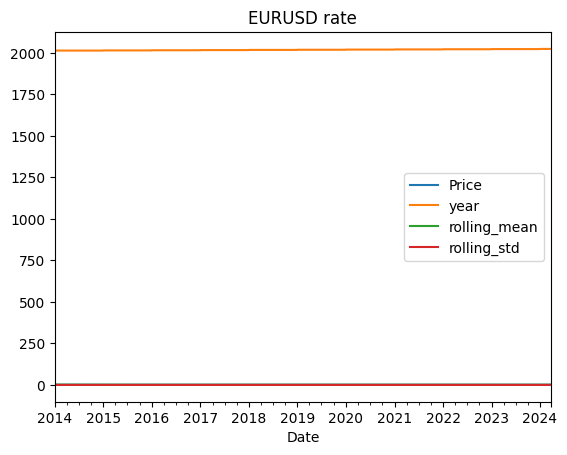

In [ ]:
#Add rolling mean and standard deviation:
WINDOW_SIZE = 12
df["rolling_mean"] = df["Price"].rolling(window=WINDOW_SIZE).mean()
df["rolling_std"] = df["Price"].rolling(window=WINDOW_SIZE).std()
df.plot(title="EURUSD rate")

In [ ]:
from statsmodels.tsa.seasonal import STL

Text(0.5, 0.98, 'STL Decomposition')

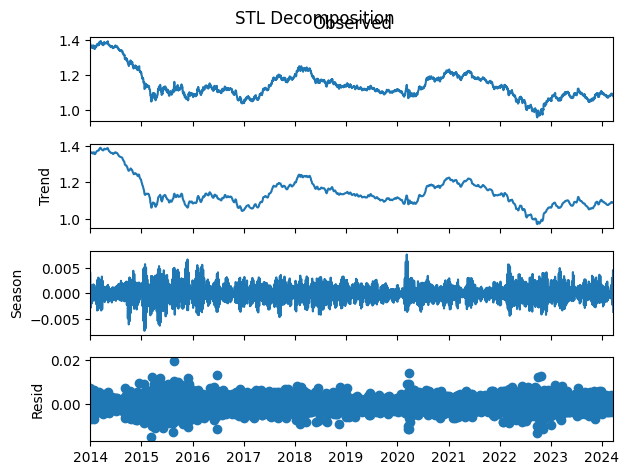

In [ ]:
stl_decomposition = STL(df[["Price"]]).fit()
stl_decomposition.plot().suptitle("STL Decomposition")

**Modeling for AutoML**

In [ ]:
df = pd.read_csv('/content/eurusd_histo_data.csv')
column_names =['Open','High','Low']
df.drop(column_names, axis=1, inplace=True)
df.head()

Date   Price
0  01 January 2014  1.3754
1  02 January 2014  1.3672
2  03 January 2014  1.3588
3  06 January 2014  1.3628
4  07 January 2014  1.3616

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.tail()

Date   Price
2663 2024-03-18  1.0871
2664 2024-03-19  1.0865
2665 2024-03-20  1.0918
2666 2024-03-21  1.0860
2667 2024-03-22  1.0805

In [ ]:
df = df.set_index('Date')

In [ ]:
df.head()

Price
Date              
2014-01-01  1.3754
2014-01-02  1.3672
2014-01-03  1.3588
2014-01-06  1.3628
2014-01-07  1.3616

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from datetime import date, timedelta

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 M

In [ ]:
import pycaret

In [ ]:
print(pycaret.__version__)

3.3.1


In [ ]:
!pip install --upgrade pycaret

In [ ]:
print(pycaret.__version__)

3.3.1


In [ ]:
from pycaret.datasets import get_data
from pycaret.regression import *

In [ ]:
from pycaret.time_series import TSForecastingExperiment

In [ ]:
print(type(exp))

<class 'pycaret.time_series.forecasting.oop.TSForecastingExperiment'>


In [ ]:
exp = TSForecastingExperiment()
exp.setup(df,target ='Price',fh = 10,fold = 5,session_id =42)

In [ ]:
best_pipelines = exp.compare_models(sort='MAPE',turbo = False,n_select =5)

Processing:   0%|          | 0/133 [00:00<?, ?it/s]

In [ ]:
exp.plot_model(plot ='diagnostics',fig_kwargs ={'height':800,'width' : 1000})

In [ ]:
exp.plot_model(plot = 'cv')

In [ ]:
exp.check_stats()

/usr/local/lib/python3.10/dist-packages/pycaret/internal/tests/time_series.py:396: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting          Value  
0                                    2668.0  
1                                       0.0  
2                                  1.142262  
3                                   1.12465  
4                                  0.081026  
5                                  0.006565  
6                                  1.571489  
7                                  1.163642  
8                                    1568.0  
9   {'alpha': 0.05, 'K': 24}   58896.116515  
10  {'alpha': 0.05, 'K': 48}  108048.125534  
11  {'alpha': 0.05, 'K': 24}            0.0  
12  {'alpha': 0.05, 'K': 48}            0.0  
13  {'alpha': 0.05, 'K': 24}            0.0  
14  {'alpha': 0.05, 'K': 48}            0.0  
15           {'alpha': 0.05}          False  
16           {'alpha': 0.05}       0.050664  
17           {'alpha': 0.05}      -2.856356  
18           {'alpha': 0.05}      -3.432804  
19           {'alpha': 0.05}      -2.862624  
20           {'alpha': 0.05}      -2.567347  
21           {'alpha': 0.05}          False  
22           {'alpha': 0.05}           0.01  
23           {'alpha': 0.05}       0.464546  
24           {'alpha': 0.05}          0.119  
25           {'alpha': 0.05}          0.146  
26           {'alpha': 0.05}          0.176  
27           {'alpha': 0.05}          0.216  
28           {'alpha': 0.05}          False  
29           {'alpha': 0.05}            0.0

In [ ]:
exp.check_stats(test = 'summary')

Test   Test Name         Data            Property Setting        Value
0  Summary  Statistics  Transformed              Length          2668.000000
1  Summary  Statistics  Transformed    # Missing Values             0.000000
2  Summary  Statistics  Transformed                Mean             1.142262
3  Summary  Statistics  Transformed              Median             1.124650
4  Summary  Statistics  Transformed  Standard Deviation             0.081026
5  Summary  Statistics  Transformed            Variance             0.006565
6  Summary  Statistics  Transformed            Kurtosis             1.571489
7  Summary  Statistics  Transformed            Skewness             1.163642
8  Summary  Statistics  Transformed   # Distinct Values          1568.000000

In [ ]:
best_pipeline_tuned = [exp.tune_model(best)for model in best_pipelines]
best_pipeline_tuned

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.8s finished


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.1s finished


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.7s finished


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.3s finished


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.1s finished


[BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                     fe_target_rr=[WindowSummarizer(lag_feature={'lag': [31, 30,
                                                                         29, 28,
                                                                         27, 26,
                                                                         25, 24,
                                                                         23, 22,
                                                                         21, 20,
                                                                         19, 18,
                                                                         17, 16,
                                                                         15, 14,
                                                                         13, 12,
                                                                         11, 10,
                                           

In [ ]:
combined_model = exp.blend_models(best_pipeline_tuned, method ='mean')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
y_pred = exp.predict_model(combined_model)

In [ ]:
exp.plot_model(estimator = combined_model)

In [ ]:
final_model =exp.finalize_model(combined_model)
y_pred

y_pred
2024-03-21  1.0954
2024-03-22  1.0960

In [ ]:
exp = TSForecastingExperiment()
exp.setup(df,target ='Price',fh = 10,fold = 5,session_id =42)

In [ ]:
from pycaret.regression import*
exp_s = setup(df, target = 'Price')
best = compare_models(sort='MAE')

Processing:   0%|          | 0/81 [00:00<?, ?it/s]